In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import statsmodels.stats.multitest
#sys.path.append('C:\\Users\\brittany\\henderson\\GitHub\\GBM_for_CPTAC\\')
#import cis_functions as f
#sys.path.append('C:\\Users\\Lindsey\\Documents\\GitHub\\WhenMutationsDontMatter\\')
#import plot_utils as p


import cptac
import cptac.utils as u

In [7]:
df = pd.read_csv('pancan_EGFR_other.csv')
df = df.drop(['Unnamed: 0'], axis=1)
filtered_data = df[df["Comparison"]== "HBB"]
filtered_data

,Comparison,Slope_Gbm,R_squared_gbm,P_value_Gbm,Slope_kidney,R_squared_kidney,P_value_kidney,Slope_Endo,R_squared_Endo,P_value_Endo,...,P_value_Brca,Slope_Luad,R_squared_Luad,P_value_Luad,Slope_hnscc,R_squared_hnscc,P_value_hnscc,Slope_colon,R_squared_colon,P_value_colon
9485,HBB,0.075558,0.007389,0.374141,1.154405,0.395013,1.013227e-22,0.207023,0.008831,0.262559,...,0.030306,-0.366504,0.025284,0.020848,-0.397717,0.101787,0.000014,1.026918,0.098151,0.000007


In [3]:
df_slope = df.loc[:,["Comparison","Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc","Slope_colon"]]
df_slope = df_slope.dropna(thresh = 6)
df_p_value = df.loc[:,["Comparison","Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc","Slope_colon"]]

In [4]:
df_slope["SD"] = (df_slope.loc[:,["Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc","Slope_colon"]].std(axis = 1))
df_p_value["P_value"] = (df.loc[:,["Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc","Slope_colon"]].std(axis = 1))

In [5]:
df_slope.nlargest(10, 'SD')

,Comparison,Slope_Gbm,Slope_kidney,Slope_Endo,Slope_Ovar,Slope_Brca,Slope_Luad,Slope_hnscc,Slope_colon,SD
9071,SST,-0.122779,-0.278649,0.226377,-0.011815,NaN,NaN,-3.951054,1.002582,1.739064
12569,NPY,-0.037483,-1.749800,-0.208456,1.298313,NaN,-0.189964,NaN,2.797162,1.552070
5972,PDIA2,-0.093888,1.535078,-0.429900,0.161539,NaN,NaN,0.056002,3.456366,1.474265
14753,ADH1C,NaN,-1.820067,-0.115785,1.173457,0.442725,-0.930902,-0.481819,1.888457,1.262311
13351,NPTX2,0.010921,1.593781,-0.412504,-0.115449,NaN,NaN,0.307789,-2.298863,1.262055
6240,DCD,-0.066037,-0.730029,-0.336773,2.409143,-0.223959,NaN,NaN,NaN,1.253332
14995,SPINK5,NaN,-1.190607,0.628365,2.019295,NaN,-0.083997,-0.653279,NaN,1.247012
3526,OGN,-0.181394,-0.195543,0.094652,2.412038,0.054582,-0.432610,-0.648614,2.383926,1.234737
9847,SLC14A1,0.049015,0.531918,0.375720,0.537106,NaN,-0.183170,3.293860,-0.331862,1.231552
10344,COLEC10,-0.037030,-0.238659,NaN,NaN,-0.297738,-0.183814,NaN,2.540674,1.224710


In [6]:
df_slope["mean"] = (df_slope.loc[:,["Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc"]].mean(axis = 1))
df_slope["median"] = (df_slope.loc[:,["Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc"]].median(axis = 1))
df_slope

,Comparison,Slope_Gbm,Slope_kidney,Slope_Endo,Slope_Ovar,Slope_Brca,Slope_Luad,Slope_hnscc,SD,mean,median
0,PHLDA1,0.536872,0.189696,0.304536,0.840646,0.363866,0.236356,0.329068,0.223368,0.400149,0.329068
2,GPRIN3,-0.196871,-0.032602,0.168797,0.131152,-0.063316,-0.136077,-0.145481,0.140504,-0.039200,-0.063316
3,NFIA,0.234934,0.241707,0.052400,0.418724,-0.093636,NaN,-0.189774,0.229309,0.110726,0.143667
5,ARMT1,-0.102381,-0.155257,-0.041317,-0.182292,-0.659200,-0.061708,-0.009452,0.222955,-0.173087,-0.102381
6,PI4K2A,-0.125771,0.008335,0.251862,0.019957,0.073559,-0.011618,0.119563,0.117930,0.047984,0.019957
...,...,...,...,...,...,...,...,...,...,...,...
16759,SCEL,NaN,NaN,0.015709,0.975582,0.348912,0.083392,-0.460300,0.526068,0.192659,0.083392
16760,SCEL,NaN,NaN,0.015709,0.975582,0.348912,0.083392,-0.460300,0.526068,0.192659,0.083392
16761,SCEL,NaN,NaN,0.015709,0.975582,0.348912,0.083392,-0.460300,0.526068,0.192659,0.083392
16772,TGIF1,NaN,NaN,0.003097,0.028822,-0.077305,0.084055,-0.264394,0.135642,-0.045145,0.003097


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1752a0b8>]],
      dtype=object)

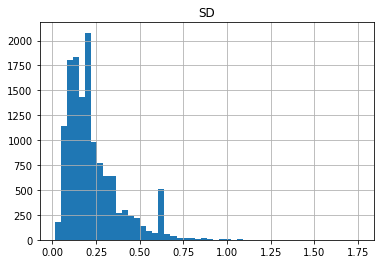

In [7]:
df_slope.hist(column='SD', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1886cb38>]],
      dtype=object)

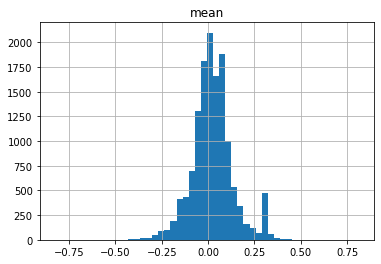

In [8]:
df_slope.hist(column='mean', bins = 50)

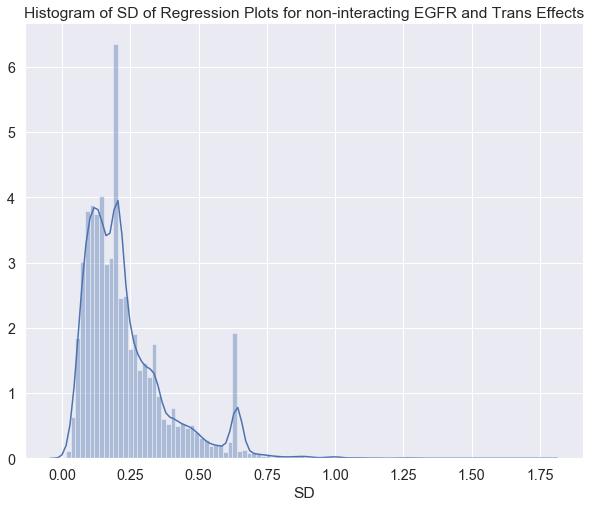

In [11]:
plt.rcParams["figure.figsize"] = (10,8)
sns.set(font_scale = 1.3)
a = sns.distplot(df_slope["SD"], bins = 100).set_title('Histogram of SD of Slopes from Regression Plots for non-interacting EGFR and Trans Effects')

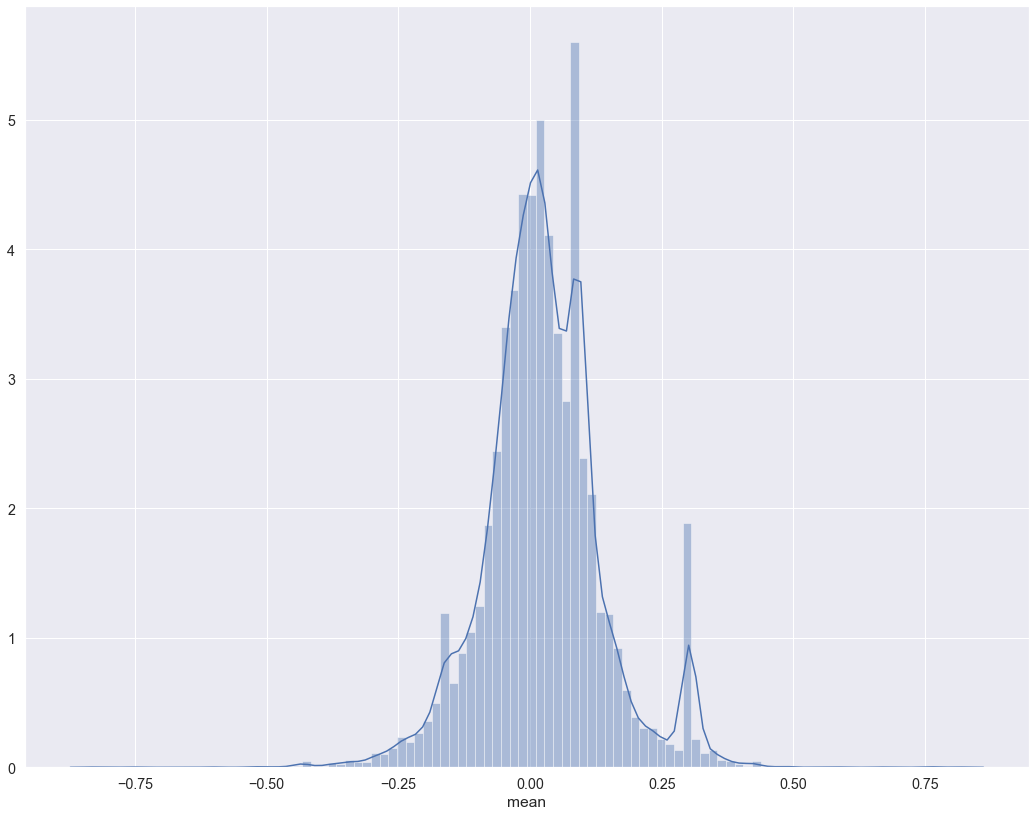

In [10]:
plt.rcParams["figure.figsize"] = (18,14)
sns.set(font_scale = 1.3)
a = sns.distplot(df_slope["mean"], bins = 100).set_title('Histogram of Mean of Regression Plots for non-interacting EGFR and Trans Effects')

In [8]:
df_pvalue = df.loc[:,["Comparison","P_value_Gbm","P_value_kidney","P_value_Endo","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon"]]
df_pvalue= df_pvalue.dropna(thresh = 6)
df_pvalue["SD"] = (df_pvalue.loc[:,["Comparison","P_value_Gbm","P_value_kidney","P_value_Endo","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon"]].std(axis = 1))
df_pvalue.nlargest(10, 'SD')

,Comparison,P_value_Gbm,P_value_kidney,P_value_Endo,P_value_Ovar,P_value_Brca,P_value_Luad,P_value_hnscc,P_value_colon,SD
14520,NPR2,0.961414,2.866775e-03,0.000105,1.171491e-03,NaN,NaN,9.535182e-01,NaN,0.523678
17122,COL10A1,NaN,NaN,NaN,8.472172e-01,0.983758,0.000694,1.566067e-02,1.354151e-04,0.500794
13619,GBP6,0.926146,NaN,0.924933,1.341225e-02,NaN,0.046705,2.715830e-03,NaN,0.495733
14744,POMGNT1,0.999808,2.297600e-08,0.014215,9.332876e-01,0.248469,0.959078,8.080698e-03,NaN,0.487050
14640,RPF1,0.980359,2.519512e-12,0.990684,9.129262e-01,0.000334,NaN,2.992629e-01,1.178094e-03,0.485903
13772,NAA35,0.953013,4.579310e-16,0.984837,7.458024e-02,0.058597,0.004766,2.434190e-06,9.479909e-01,0.484463
2726,HNRNPA1L2,0.013006,NaN,0.895613,2.773783e-10,0.159678,0.936955,NaN,9.665358e-01,0.483310
13818,TM2D3,0.960952,9.378567e-01,0.000006,NaN,NaN,0.002071,4.878844e-04,7.271005e-02,0.481413
14686,LIMS2,0.989895,6.685584e-07,0.976145,9.460243e-06,0.004517,NaN,1.562649e-08,2.888136e-16,0.479242
14687,LIMS2,0.989895,6.685584e-07,0.976145,9.460243e-06,0.004517,NaN,1.562649e-08,2.888136e-16,0.479242


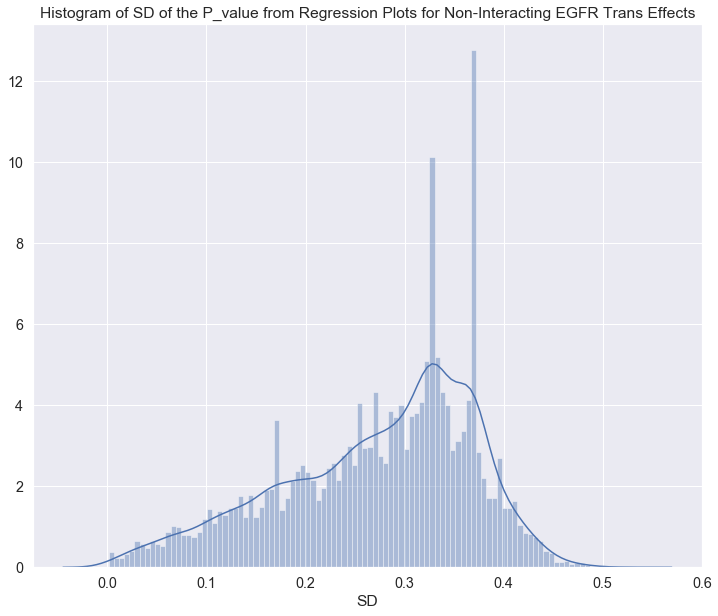

In [9]:
plt.rcParams["figure.figsize"] = (12,10)
sns.set(font_scale = 1.3)
a = sns.distplot(df_pvalue["SD"], bins = 100).set_title('Histogram of SD of the P_value from Regression Plots for Non-Interacting EGFR Trans Effects')